#  Re-orienting Cylindrical Projections

This notebook re-orients some cylindrial projection maps.  It does this by moving the globe - it uses the same projection math, but presents a rotated earth. 

Each map produced here is just as valid as the standard map using the same projection with the standard orientation (equator at center, north on top).  

In [7]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread, imwrite

from map_projections.projections import (
    transform_map, rotationFromTwoLocations, rotationFromXYZ
)

In [4]:
bigmap = imread('input_images/nasa_world_july_5400x2700.jpg')
bigwintermap = imread('input_images/nasa_earth_december_5400x2700.jpg')

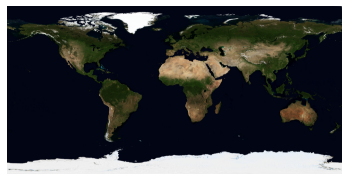

In [5]:
plt.imshow(bigmap)
_ = plt.axis('off')

# Small Example Rotations

Let's look at what the map looks like if we just move the globe a little.  We'll show plots rotating the earth a bit in each direction.  

Remember each of these maps is just as valid a projection as the standard one shown above!

The first two look like twisting the standard map a bit clockwise and then counterclockwise.  The next two look like pulling the north pole down a bit or the south pole up a bit.  The final two are not very interesting - just rotating along the north/south axis. 

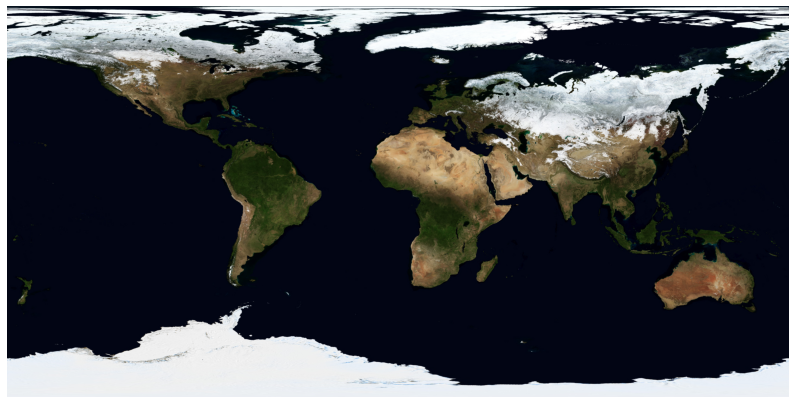

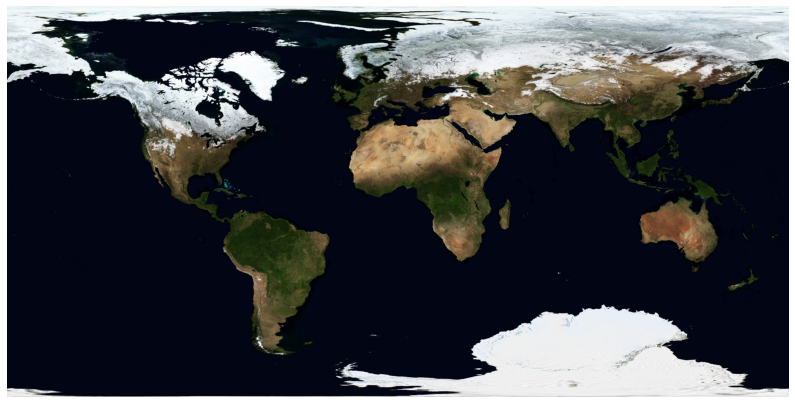

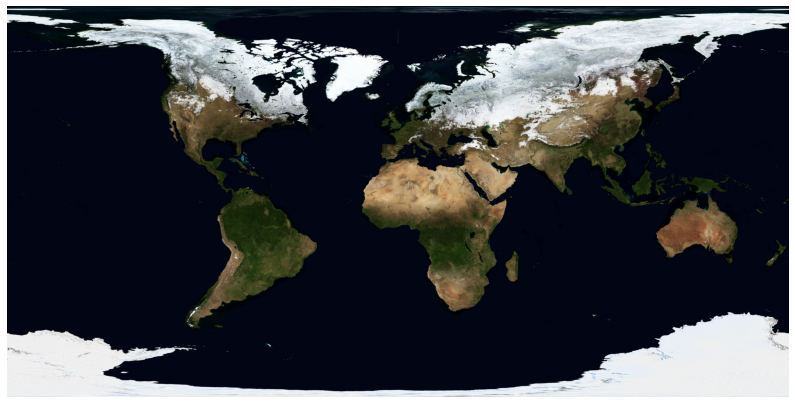

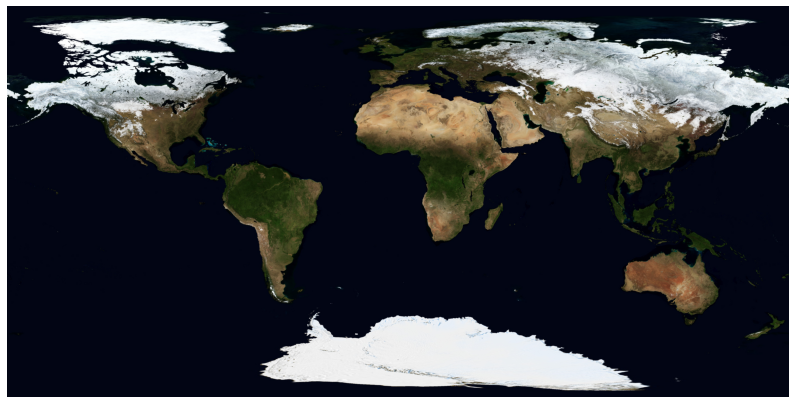

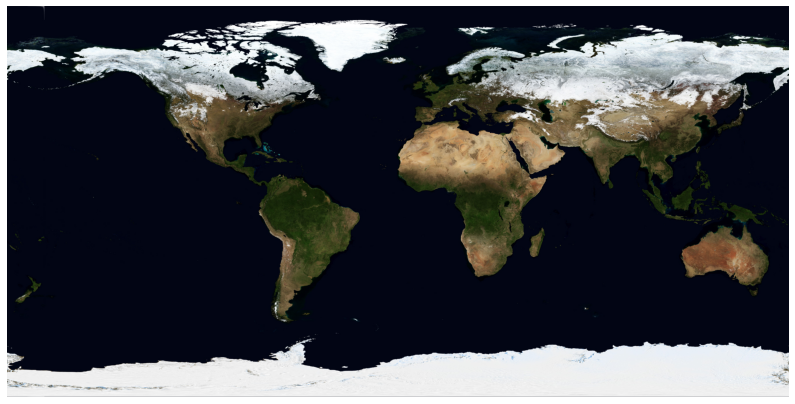

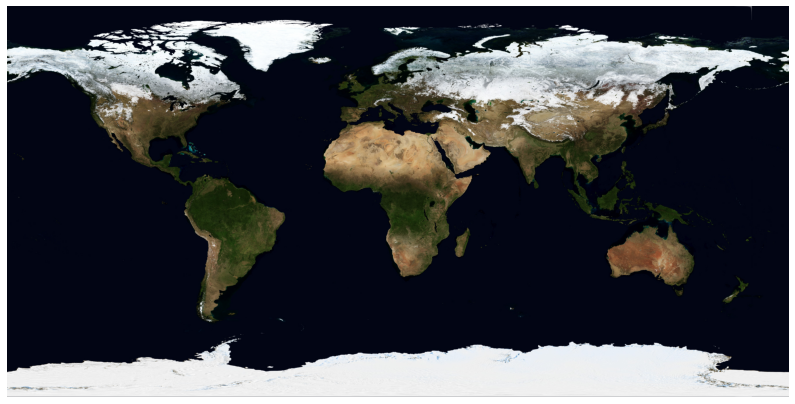

In [8]:
smallxplus = transform_map(bigwintermap,
                                      rotationFromXYZ(0.30, 0.0, 0.0),
                                      in_projection='platecarre',
                                      out_projection='platecarre',
                                      display=False, debug=False)
plt.figure(figsize=(14,10))
plt.imshow(smallxplus)
_ = plt.axis("off")
#imsave('~/smallxplus.png', smallxplus)

smallxminus = transform_map(bigwintermap,
                                      rotationFromXYZ(-0.30, 0.0, 0.0),
                                      in_projection='platecarre',
                                      out_projection='platecarre',
                                      display=False, debug=False)
plt.figure(figsize=(14,10))
plt.imshow(smallxminus)
_ = plt.axis("off")
#  misc.imsave('~/smallxminus.png', smallxminus)

smallyminus = transform_map(bigwintermap,
                                      rotationFromXYZ(0.0, -0.30, 0.0),
                                      in_projection='platecarre',
                                      out_projection='platecarre',
                                      display=False, debug=False)
plt.figure(figsize=(14,10))
plt.imshow(smallyminus)
_ = plt.axis("off")
#  imsave('~/smallyminus.png', smallyminus)

smallyplus = transform_map(bigwintermap,
                                      rotationFromXYZ(0.0, 0.30, 0.0),
                                      in_projection='platecarre',
                                      out_projection='platecarre',
                                      display=False, debug=False)
plt.figure(figsize=(14,10))
plt.imshow(smallyplus)
_ = plt.axis("off")
# misc.imsave('~/smallyplus.png', smallyplus)

smallzminus = transform_map(bigwintermap,
                                      rotationFromXYZ(0.0, 0.0, -0.30),
                                      in_projection='platecarre',
                                      out_projection='platecarre',
                                      display=False, debug=False)
plt.figure(figsize=(14,10))
plt.imshow(smallzminus)
_ = plt.axis("off")
#  misc.imsave('~/smallzminus.png', smallzminus)

smallzplus = transform_map(bigwintermap,
                                      rotationFromXYZ(0.0, 0.0, 0.30),
                                      in_projection='platecarre',
                                      out_projection='platecarre',
                                      display=False, debug=False)
plt.figure(figsize=(14,10))
plt.imshow(smallzplus)
_ = plt.axis("off")
# imsave('~/smallzplus.png', smallzplus)

##  Rotations for Maps from A to B

One way to choose an orientation is to select two locations to center left and right in the center of the map.  These are really interesting - remember they're just as valid as the standard orientations.  Splitting continents like this really shows how distortive these projections (and anything going from the surface of a sphere to a plane) are.

In [9]:
# First set up latitude and longitude
ll_san_francisco = (-122.4194, 37.7749)
ll_melbourne = (144.9631, -37.8136)
ll_seoul = (126.9780, 37.5665)
ll_beijing = (116.4074, 39.9042)
ll_lagos = (3.3792, 6.5244)
ll_buenos_aires = (-58.3816, -34.6037)
ll_helsinki = (24.9384, 60.1699)

# Then get the same in radians
san_francisco = tuple([d * np.pi / 180.0 for d in ll_san_francisco])
melbourne = tuple([d * np.pi / 180.0 for d in ll_melbourne])
seoul = tuple([d * np.pi / 180.0 for d in ll_seoul])
beijing = tuple([d * np.pi / 180.0 for d in ll_beijing])
lagos = tuple([d * np.pi / 180.0 for d in ll_lagos])
buenos_aires = tuple([d * np.pi / 180.0 for d in ll_buenos_aires])
helsinki = tuple([d * np.pi / 180.0 for d in ll_helsinki])

In [ ]:
large_sf_to_melbourne = transform_map(bigmap,
                                      rotationFromTwoLocations(san_francisco, melbourne),
                                      in_projection='platecarre',
                                      out_projection='platecarre',
                                      display=False, debug=False)
plt.figure(figsize=(14,10))
plt.imshow(large_sf_to_melbourne)
_ = plt.axis("off")
#imsave('~/sf_to_melbourne.png', large_sf_to_melbourne)

#  Yes, this is just the other map upside down
large_melbourne_to_sf = transform_map(bigmap,
                                      rotationFromTwoLocations(melbourne, san_francisco),
                                      in_projection='platecarre',
                                      out_projection='platecarre',
                                      display=False, debug=False)
plt.figure(figsize=(14,10))
plt.imshow(large_melbourne_to_sf)
_ = plt.axis("off")
#imsave('~/melbourne_to_sf.png', large_melbourne_to_sf)

large_sf_to_buenos_aires = transform_map(bigmap,
                                      rotationFromTwoLocations(san_francisco, buenos_aires),
                                      in_projection='platecarre',
                                      out_projection='platecarre',
                                      display=False, debug=False)
plt.figure(figsize=(14,10))
plt.imshow(large_sf_to_buenos_aires)
_ = plt.axis("off")
#  imsave('~/large_sf_to_buenos_aires.png', large_sf_to_buenos_aires)

large_sf_to_helsinki = transform_map(bigmap,
                                      rotationFromTwoLocations(san_francisco, helsinki),
                                      in_projection='platecarre',
                                      out_projection='platecarre',
                                      display=False, debug=False)
plt.figure(figsize=(14,10))
plt.imshow(large_sf_to_helsinki)
_ = plt.axis("off")
#imsave('~/large_sf_to_helsinki.png', large_sf_to_helsinki)

large_lagos_to_beijing = transform_map(bigmap,
                                      rotationFromTwoLocations(lagos, beijing),
                                      in_projection='platecarre',
                                      out_projection='platecarre',
                                      display=False, debug=False)
plt.figure(figsize=(14,10))
plt.imshow(large_lagos_to_beijing)
_ = plt.axis("off")
#imsave('~/large_lagos_to_beijing.png', large_lagos_to_beijing)

large_lagos_to_melbourne = transform_map(bigmap,
                                      rotationFromTwoLocations(lagos, melbourne),
                                      in_projection='platecarre',
                                      out_projection='platecarre',
                                      display=False, debug=False)
plt.figure(figsize=(14,10))
plt.imshow(large_lagos_to_melbourne)
_ = plt.axis("off")
# imsave('~/large_lagos_to_melbourne.png', large_lagos_to_melbourne)